<a href="https://colab.research.google.com/github/petrusthelastking/TANDANG_GAWE_KUIS_ULO-PYTHON-/blob/main/JS09_Klasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Praktikum 1

## Load Data

In [3]:
data = pd.read_csv('iris (4).csv')
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Eksplorasi Data

In [4]:
data.info()
data.describe()
data['species'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,count
species,
setosa,50
versicolor,50
virginica,50


## Visualisasi Data

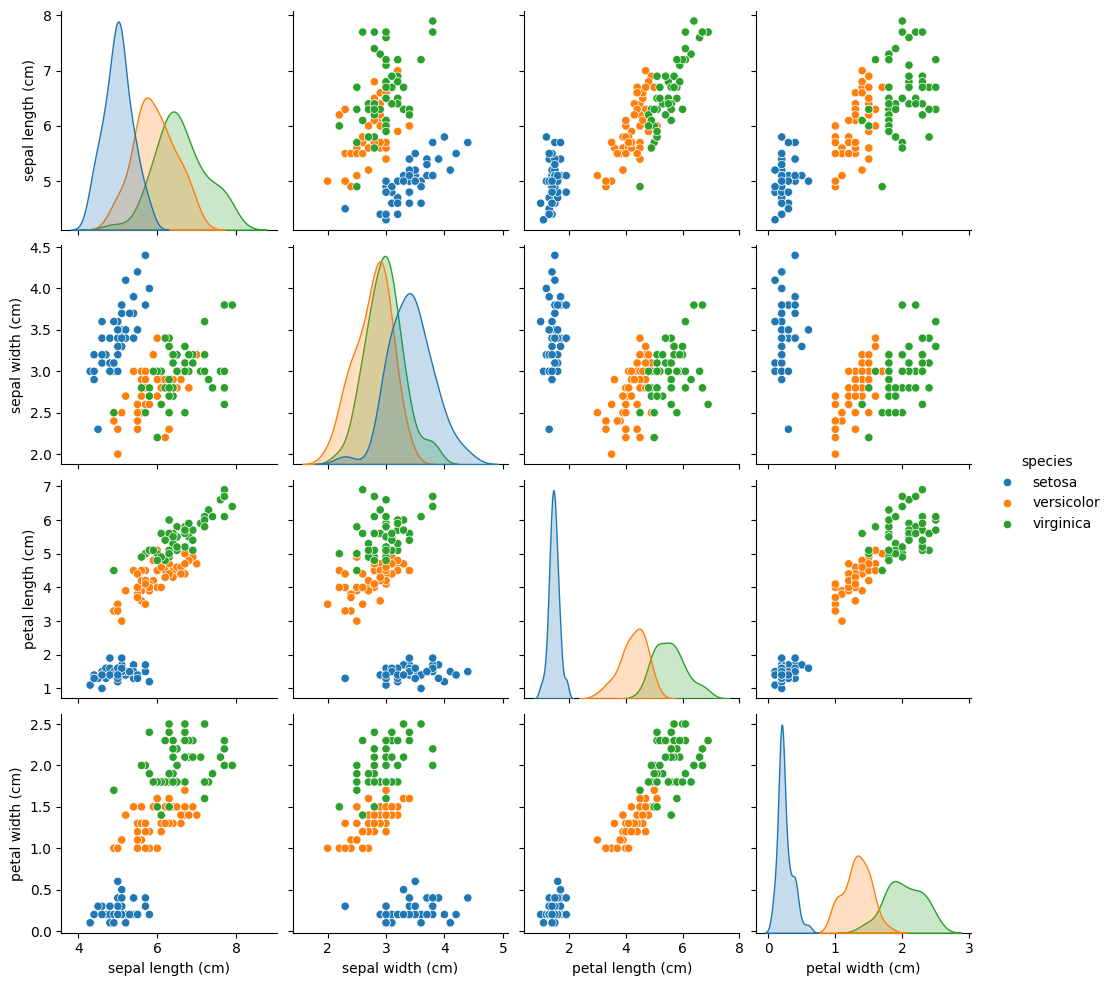

In [7]:
sns.pairplot(data, hue='species')
plt.show()

## Preprocessing

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.iloc[:, :-1]   # semua kolom kecuali label
y = data.iloc[:, -1]    # kolom label terakhir

# Split data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardisasi
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Buat Model kNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier

# Tentukan nilai K (misalnya 3)
knn = KNeighborsClassifier(n_neighbors=3)

# Latih model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Evaluasi Model kNN

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = knn.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi: 1.0
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Laporan Klasifikasi:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



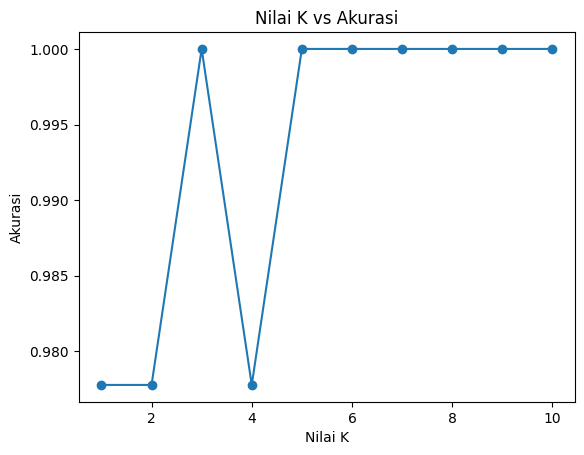

In [11]:
acc = []
for k in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    acc.append(model.score(X_test, y_test))

plt.plot(range(1, 11), acc, marker='o')
plt.title('Nilai K vs Akurasi')
plt.xlabel('Nilai K')
plt.ylabel('Akurasi')
plt.show()


# Praktikum 2

## Buat Dataset Dummy

In [14]:
from sklearn.datasets import make_classification

# Membuat data dummy
# Hasil dari make_classification berupa data fitur X dan label y
# Label y akan berupa data yang sudah di encode (angka)
X,y = make_classification(n_samples=30, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, shuffle=False)

# Secara defalt, make_classfication menghasilkan nilai float
# Kita perlu merubah dalam bentuk diskrit

# Absolutekan nilai
X = np.absolute(X)

# Bulatkan nilai ke 2 angka dibelakang koma
# Kalikan dengan 100 supaya tidak ada lagi koma
X = np.round(X, 2) * 100

# Ubah ke dalam bentuk integer
X = X.astype(int)

# Cek Hasil
print(X)
print(y)

[[111  60]
 [  6 249]
 [110 206]
 [ 13 258]
 [ 76 192]
 [ 23 115]
 [123 106]
 [164  46]
 [206  89]
 [ 67 103]
 [227  90]
 [ 67 107]
 [225 113]
 [ 11 118]
 [274  96]
 [ 49  92]
 [219  16]
 [ 98 127]
 [227  25]
 [ 67 106]
 [ 61 151]
 [ 43 158]
 [152 147]
 [ 91 244]
 [ 27  35]
 [ 56 190]
 [172  12]
 [249  81]
 [374 170]
 [199  54]]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1]


## (Opsional) - Membuat Data Frame

In [15]:
# Reshape label y menjadi 2D
# Hal ini dilakukan karena kita akan menggabungkannya dengan data fitur X
y_new = y.reshape(len(y), 1)

# Gabungkan fitur X dan label y dalam data array
data = np.concatenate((X, y_new), axis=1)

# Definisikan nama kolom
nama_kolom = ['Fitur 1', 'Fitur 2', 'Label']

# Buat Data Frame
df = pd.DataFrame(data, columns=nama_kolom)

# Cek Data Frame
df.head()

,Fitur 1,Fitur 2,Label
0,111,60,0
1,6,249,0
2,110,206,0
3,13,258,0
4,76,192,0


## (Opsional) - Labeling

In [16]:
# Definisikan nama label
labels = {
    1 : 'Kelas A',
    0 : 'Kelas B'
}

# Copy Data Frame untuk menyimpan Data Frame baru
# dengan label yang mudah untuk dibaca
df_label = df.copy()

# Ubah label dengan fungsi mapping dari Pandas
# pada Data Frame df_label
df_label['Label'] = df_label['Label'].map(labels)

# Cek Data Frame df_label
df_label.head()

,Fitur 1,Fitur 2,Label
0,111,60,Kelas B
1,6,249,Kelas B
2,110,206,Kelas B
3,13,258,Kelas B
4,76,192,Kelas B


## Visualisasi Data

/tmp/ipython-input-4235875654.py:9: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  class_a = gb.get_group('Kelas A')
/tmp/ipython-input-4235875654.py:10: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  class_b = gb.get_group('Kelas B')


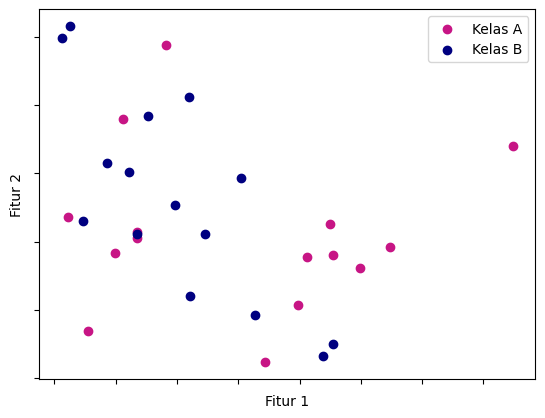

In [17]:
# Definisikan warna untuk setiap kelas
colors = {
    'class_a': 'MediumVioletRed',
    'class_b': 'Navy'
}

# Kelompokkan label berdasarkan nama kelas
gb = df_label.groupby(['Label'])
class_a = gb.get_group('Kelas A')
class_b = gb.get_group('Kelas B')

# Plot
plt.scatter(x=class_a['Fitur 1'], y=class_a['Fitur 2'], c=colors['class_a'])
plt.scatter(x=class_b['Fitur 1'], y=class_b['Fitur 2'], c=colors['class_b'])
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend(['Kelas A', 'Kelas B'])
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

## Model Multinomial Naive Bayes

In [18]:
from sklearn.naive_bayes import MultinomialNB # class untuk model MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # evaluasi model berdasarkan akurasi

# Inisiasi obyek MultinomialNB
mnb = MultinomialNB()

# Kita dapat langsung menggunakan fitur X dan label y
# hasil dari proses pembuatan data dummy

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)

# Fit model
# Label y harus dalam bentuk 1D atau (n_samples,)
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred = mnb.predict(X_train)

# Evaluasi akurasi training
acc_train = accuracy_score(y_train, y_train_pred)

# Prediksi test data
y_test_pred = mnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test = accuracy_score(y_test, y_test_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.6190476190476191
Hasil akurasi data test: 0.4444444444444444


## Model Gaussian Naive Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB # class untuk model GaussianNB

# Inisiasi obyek Gaussian
gnb = GaussianNB()

# Kita menggunakan split data training dan testing
# yang sama dengan model multinomial

# Fit model
# Label y harus dalam bentu 1D atau (n_samples,)
gnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred_gnb = gnb.predict(X_train)

# Evaluasi akurasi training
acc_train_gnb = accuracy_score(y_train, y_train_pred_gnb)

# Prediksi test data
y_test_pred_gnb = gnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test_gnb = accuracy_score(y_test, y_test_pred_gnb)

# Print hasil evaluasi
print(f'Hasil akurasi data train (Gaussian): {acc_train_gnb}')
print(f'Hasil akurasi data test (Gaussian): {acc_test_gnb}')

Hasil akurasi data train (Gaussian): 0.7142857142857143
Hasil akurasi data test (Gaussian): 0.5555555555555556


# Praktikum 3

## Load Data

In [20]:
df = pd.read_csv('spam.csv', encoding='latin-1') # spesifiksi encoding diperlukan karena data tidak menggunakan UTF-8

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Preprocessing

### 2a - Drop Kolom

In [21]:
# Drop 3 kolom terakhir dengan fungsi iloc
df = df.drop(df.iloc[:,2:], axis=1)

# Cek data
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### 2b - Inspeksi Data

In [24]:
# Cek Jumlah Data Per Kelas
print(df['v1'].value_counts())
print('\n')

# Cek Kelengkapan Data
print(df.info())
print('\n')

# Cek Statistik Deskriptif
print(df.describe())

v1
ham     4825
spam     747
Name: count, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


          v1                      v2
count   5572                    5572
unique     2                    5169
top      ham  Sorry, I'll call later
freq    4825                      30


## 2c - Encoding Label

In [26]:
# Data untuk label
new_labels = {
    'spam': 1,
    'ham': 0
}

# Encode label
df['label'] = df['v1'].map(new_labels)

# Cek data
df.head()

,v1,v2,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


### 2d - Pisahkan Fitur dengan Label

In [28]:
X = df['v2'].values
y = df['label'].values

## Ekstraksi Fitur

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Inisiasi CountVectorizer
bow = CountVectorizer()

# Fitting dan transform X_train dengan CountVectorizer
X_train = bow.fit_transform(X_train)

# Transform X_test
# Mengapa hanya transform? Alasan yang sama dengan kasus pada percobaan ke-3
# Kita tidak menginginkan model mengetahui paramter yang digunakan oleh CountVectorizer untuk fitting data X_train
# Sehingga, data testing dapat tetap menjadi data yang asing bagi model nantinya
X_test = bow.transform(X_test)

In [32]:
print(len(bow.get_feature_names_out()))
print(f'Dimensi data: {X_train.shape}')

7727
Dimensi data: (4457, 7727)


## Training dan Evaluasi Model

In [33]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = mnb.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data training
y_pred_test = mnb.predict(X_test)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.9946152120260264
Hasil akurasi data test: 0.9775784753363229


# TUGAS 1
Lakukan klasifikasi suara male dan female menggunakan kNN pada dataset "voice.csv". Identifikasi fitur-fitur terbaik dan nilai k optimal untuk model tersebut, serta lampirkan grafik analisis dan alasan pemilihan nilai k.

## Load data

### Subtask:
Muat dataset `voice.csv` ke dalam DataFrame pandas.


In [44]:
df_voice = pd.read_csv('voice.csv')
df_voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


## Preprocessing

### Subtask:
Lakukan pra-pemrosesan data, termasuk encoding label 'male'/'female' menjadi nilai numerik.


In [37]:
# Check data types and null values
print(df_voice.info())
print('\n')

# Check the distribution of labels
print(df_voice['label'].value_counts())
print('\n')

# Encode labels
label_mapping = {'male': 1, 'female': 0}
df_voice['label'] = df_voice['label'].map(label_mapping)

# Verify encoding
print(df_voice.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

## Feature selection

### Subtask:
Identifikasi dan pilih fitur-fitur yang paling relevan untuk klasifikasi.


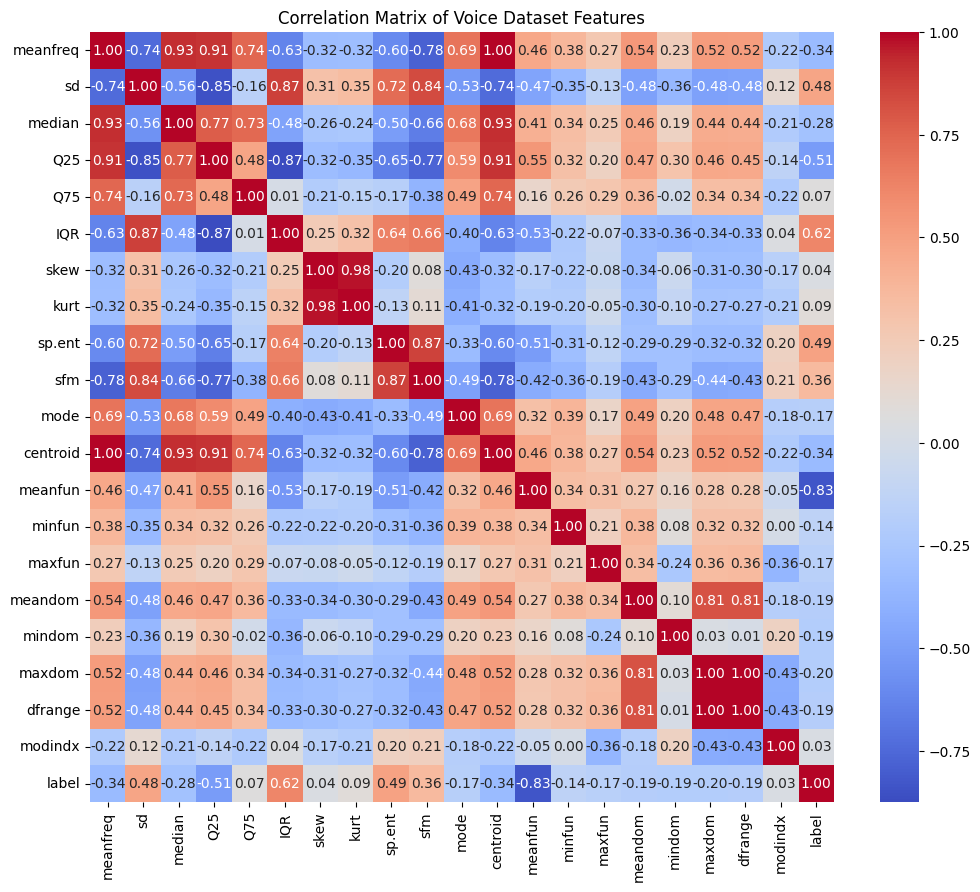

In [38]:
# Calculate the correlation matrix
correlation_matrix = df_voice.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Voice Dataset Features')
plt.show()

In [39]:
# Based on the heatmap, identify features highly correlated with 'label'
# Looking at the last row of the heatmap, features with absolute correlation values
# significantly different from 0 (e.g., > 0.5) are considered relevant.

# Features with high absolute correlation with 'label':
# - meanfreq (-0.34)
# - sd (0.48)
# - median (-0.28)
# - Q25 (-0.51)
# - Q75 (0.07 - low correlation)
# - IQR (0.62)
# - skew (0.04 - low correlation)
# - kurt (0.09 - low correlation)
# - sp.ent (0.49)
# - sfm (0.36)
# - mode (-0.17)
# - centroid (-0.34)
# - meanfun (-0.83) - very high negative correlation
# - minfun (-0.14)
# - maxfun (-0.17)
# - meandom (-0.19)
# - mindom (-0.19)
# - maxdom (-0.20)
# - dfrange (-0.19)
# - modindx (0.03 - low correlation)

# Selecting features with absolute correlation >= 0.3 (a common threshold)
relevant_features = [
    'meanfreq', 'sd', 'Q25', 'IQR', 'sp.ent', 'sfm',
    'centroid', 'meanfun', 'label'
]

# Create a new DataFrame with only the relevant features and the label
df_relevant = df_voice[relevant_features]

# Display the first few rows of the new DataFrame
display(df_relevant.head())

,meanfreq,sd,Q25,IQR,sp.ent,sfm,centroid,meanfun,label
0,0.059781,0.064241,0.015071,0.075122,0.893369,0.491918,0.059781,0.084279,1
1,0.066009,0.067310,0.019414,0.073252,0.892193,0.513724,0.066009,0.107937,1
2,0.077316,0.083829,0.008701,0.123207,0.846389,0.478905,0.077316,0.098706,1
3,0.151228,0.072111,0.096582,0.111374,0.963322,0.727232,0.151228,0.088965,1
4,0.135120,0.079146,0.078720,0.127325,0.971955,0.783568,0.135120,0.106398,1


## Split data

### Subtask:
Bagi data yang telah dipilih menjadi set pelatihan dan pengujian.


In [40]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_relevant.drop('label', axis=1)
y = df_relevant['label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets to verify the split
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (2534, 8)
Shape of X_test: (634, 8)
Shape of y_train: (2534,)
Shape of y_test: (634,)


## Model training

### Subtask:
Latih model kNN menggunakan data pelatihan.


In [41]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNeighborsClassifier
# Starting with n_neighbors = 5 as a default
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

## Evaluate model

### Subtask:
Evaluasi kinerja model menggunakan data pengujian.


In [42]:
from sklearn.metrics import accuracy_score

# Predict on the test data
y_pred = knn_model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f'Accuracy of the kNN model on the test data: {accuracy}')

Accuracy of the kNN model on the test data: 0.9826498422712934


## Optimize k

### Subtask:
Lakukan percobaan dengan berbagai nilai k untuk menemukan nilai yang optimal, dan visualisasikan hasilnya.


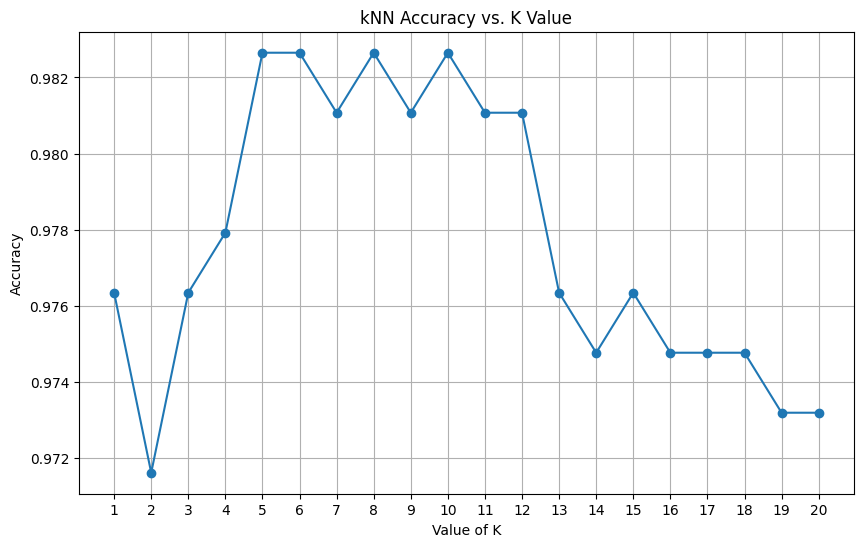

In [43]:
accuracies = []
k_range = range(1, 21) # Test k from 1 to 20

for k in k_range:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(10, 6))
plt.plot(k_range, accuracies, marker='o')
plt.title('kNN Accuracy vs. K Value')
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# TUGAS 2

## Klasifikasi dengan Multinomial Naive Bayes (TF-IDF + Stop Words)

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Pisahkan fitur (X) dan label (y) dari DataFrame yang sudah ada
X = df['v2'].values
y = df['label'].values

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Inisiasi TfidfVectorizer dengan stop_words='english'
tfidf_stopwords = TfidfVectorizer(stop_words='english')

# Fitting dan transform X_train dengan TfidfVectorizer
X_train_tfidf_sw = tfidf_stopwords.fit_transform(X_train)

# Transform X_test
X_test_tfidf_sw = tfidf_stopwords.transform(X_test)

# Inisiasi MultinomialNB
mnb_tfidf_sw = MultinomialNB()

# Fit model
mnb_tfidf_sw.fit(X_train_tfidf_sw, y_train)

# Prediksi dengan data training
y_pred_train_tfidf_sw = mnb_tfidf_sw.predict(X_train_tfidf_sw)

# Evaluasi akurasi data training
acc_train_tfidf_sw = accuracy_score(y_train, y_pred_train_tfidf_sw)

# Prediksi dengan data testing
y_pred_test_tfidf_sw = mnb_tfidf_sw.predict(X_test_tfidf_sw)

# Evaluasi akurasi data testing
acc_test_tfidf_sw = accuracy_score(y_test, y_pred_test_tfidf_sw)

# Print hasil evaluasi
print(f'Hasil akurasi data train (TF-IDF + Stop Words): {acc_train_tfidf_sw}')
print(f'Hasil akurasi data test (TF-IDF + Stop Words): {acc_test_tfidf_sw}')
print("Classification Report (TF-IDF + Stop Words):\n", classification_report(y_test, y_pred_test_tfidf_sw))

Hasil akurasi data train (TF-IDF + Stop Words): 0.9842943684092439
Hasil akurasi data test (TF-IDF + Stop Words): 0.9605381165919282
Classification Report (TF-IDF + Stop Words):
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       954
           1       1.00      0.73      0.84       161

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



## Klasifikasi dengan Multinomial Naive Bayes (CountVectorizer + Stop Words)

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Pisahkan fitur (X) dan label (y) dari DataFrame yang sudah ada
X = df['v2'].values
y = df['label'].values

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Inisiasi CountVectorizer dengan stop_words='english'
bow_stopwords = CountVectorizer(stop_words='english')

# Fitting dan transform X_train dengan CountVectorizer
X_train_sw = bow_stopwords.fit_transform(X_train)

# Transform X_test
X_test_sw = bow_stopwords.transform(X_test)

# Inisiasi MultinomialNB
mnb_sw = MultinomialNB()

# Fit model
mnb_sw.fit(X_train_sw, y_train)

# Prediksi dengan data training
y_pred_train_sw = mnb_sw.predict(X_train_sw)

# Evaluasi akurasi data training
acc_train_sw = accuracy_score(y_train, y_pred_train_sw)

# Prediksi dengan data testing
y_pred_test_sw = mnb_sw.predict(X_test_sw)

# Evaluasi akurasi data testing
acc_test_sw = accuracy_score(y_test, y_pred_test_sw)

# Print hasil evaluasi
print(f'Hasil akurasi data train (CountVectorizer + Stop Words): {acc_train_sw}')
print(f'Hasil akurasi data test (CountVectorizer + Stop Words): {acc_test_sw}')
print("Classification Report (CountVectorizer + Stop Words):\n", classification_report(y_test, y_pred_test_sw))

Hasil akurasi data train (CountVectorizer + Stop Words): 0.9946152120260264
Hasil akurasi data test (CountVectorizer + Stop Words): 0.9829596412556054
Classification Report (CountVectorizer + Stop Words):
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       954
           1       0.98      0.90      0.94       161

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115

